# Louisiana Coastal Master Plan 2029 
Calculation of relationship between FFIBS score and Organic Matter Accretion (OMAR) 

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [3]:
data_file = r'C:\Users\madel\OneDrive - University of New Orleans\CPRA_CoastalMasterPlan\MP2029_ICM_Improvements\OMAR\CRMS_OMAR_nooutlier.csv'  # Change to the path where you stored the data file
data_in = np.genfromtxt(data_file, skip_header=2, delimiter=',', dtype='str')
print(' - reading in data from %s' % data_file)

OMAR_data = {}

for row in data_in:
    reg = row[2]  # Third column is region, either Chenier or Deltaic
    basin = row[3]  # Fourth column is basin
    freqClass = row[5]  # Sixth column is Marsh Class_Most Frequent
    yrClass = row[6]  # Seventh column is Marsh_Class Soil Core Year
    com_type = row[26] #27th column is community type salt rank
    CRMS = int(row[1]) #the second column is the CRMS ID number only
    m_OMAR = float(row[16])  # 17th column is mean OMAR (g/cm2)
    FFIBS = float(row[17])  # 18th column is the FFIBS score

    if reg not in OMAR_data:
        OMAR_data[reg] = {}
        print(reg)

    if basin not in OMAR_data[reg]:
        OMAR_data[reg][basin] = {}
        print(basin)

    if freqClass not in OMAR_data[reg][basin]:
        OMAR_data[reg][basin][freqClass] = {}


    if yrClass not in OMAR_data[reg][basin][freqClass]:
        OMAR_data[reg][basin][freqClass][yrClass] = {}

        
    if com_type not in OMAR_data[reg][basin][freqClass][yrClass]:
        OMAR_data[reg][basin][freqClass][yrClass][com_type] = []     
        print(com_type)
        
    OMAR_data[reg][basin][freqClass][yrClass][com_type].append((m_OMAR,FFIBS,CRMS))

# Print the final dictionary to verify
print(list(OMAR_data.keys()))


 - reading in data from C:\Users\madel\OneDrive - University of New Orleans\CPRA_CoastalMasterPlan\MP2029_ICM_Improvements\OMAR\CRMS_OMAR_nooutlier.csv
Deltaic
PO
06_Wiregrass
11_Oystergrass
02_Bulltongue
02_Bulltongue
00_SWAMP
BS
06_Wiregrass
02_Bulltongue
02_Bulltongue
03_Three-Square
02_Bulltongue
09_Needlerush
06_Wiregrass
06_Wiregrass
07_Bulrush
10_Brackish Mix
MR
04_Roseau Cane
04_Roseau Cane
BA
11_Oystergrass
00_SWAMP
10_Brackish Mix
06_Wiregrass
10_Brackish Mix
03_Three-Square
09_Needlerush
03_Three-Square
08_Saltgrass
06_Wiregrass
06_Wiregrass
08_Saltgrass
TE
10_Brackish Mix
06_Wiregrass
11_Oystergrass
03_Three-Square
06_Wiregrass
00_SWAMP
07_Bulrush
06_Wiregrass
08_Saltgrass
08_Saltgrass
03_Three-Square
10_Brackish Mix
AT
01_Maidencane
02_Bulltongue
TV
03_Three-Square
02_Bulltongue
01_Maidencane
02_Bulltongue
06_Wiregrass
Chenier
TV
06_Wiregrass
03_Three-Square
00_SWAMP
02_Bulltongue
06_Wiregrass
07_Bulrush
06_Wiregrass
09_Needlerush
03_Three-Square
02_Bulltongue
03_Three-Squ

In [5]:
m_OMAR_values_deltaic = []
FFIBS_values_deltaic = []
m_OMAR_values_chenier = []
FFIBS_values_chenier = []
m_OMAR_values_active = []
FFIBS_values_active = []
# Iterate through all levels of nested dictionaries

for reg in OMAR_data:
    for basin in OMAR_data[reg]:
        for freqClass in OMAR_data[reg][basin]:
            for yrClass in OMAR_data[reg][basin][freqClass]:
                for com_type in OMAR_data[reg][basin][freqClass][yrClass]:
                    for m_OMAR, FFIBS, CRMS in OMAR_data[reg][basin][freqClass][yrClass][com_type]:
                        if reg == 'Deltaic':
                            if basin == 'MR':
                                if CRMS == 4626:
                                    m_OMAR_values_deltaic.append(m_OMAR)
                                    FFIBS_values_deltaic.append(FFIBS)                                     
                                else:
                                    m_OMAR_values_active.append(m_OMAR)
                                    FFIBS_values_active.append(FFIBS)
                            elif basin == 'BS':
                                if CRMS == 2614 or CRMS == 139 or CRMS == 118:
                                    m_OMAR_values_active.append(m_OMAR)
                                    FFIBS_values_active.append(FFIBS)
                                else:
                                    m_OMAR_values_deltaic.append(m_OMAR)
                                    FFIBS_values_deltaic.append(FFIBS)                                   
                            elif basin == 'AT':
                                    if freqClass == 'Swamp':
                                        m_OMAR_values_deltaic.append(m_OMAR)
                                        FFIBS_values_deltaic.append(FFIBS) 
                                    else:
                                        m_OMAR_values_active.append(m_OMAR)
                                        FFIBS_values_active.append(FFIBS)                                       
                            else:
                                m_OMAR_values_deltaic.append(m_OMAR)
                                FFIBS_values_deltaic.append(FFIBS)                                  
                        elif reg == 'Chenier':
                            m_OMAR_values_chenier.append(m_OMAR)
                            FFIBS_values_chenier.append(FFIBS)   
                        else: 
                            print('Nothing should be here.')



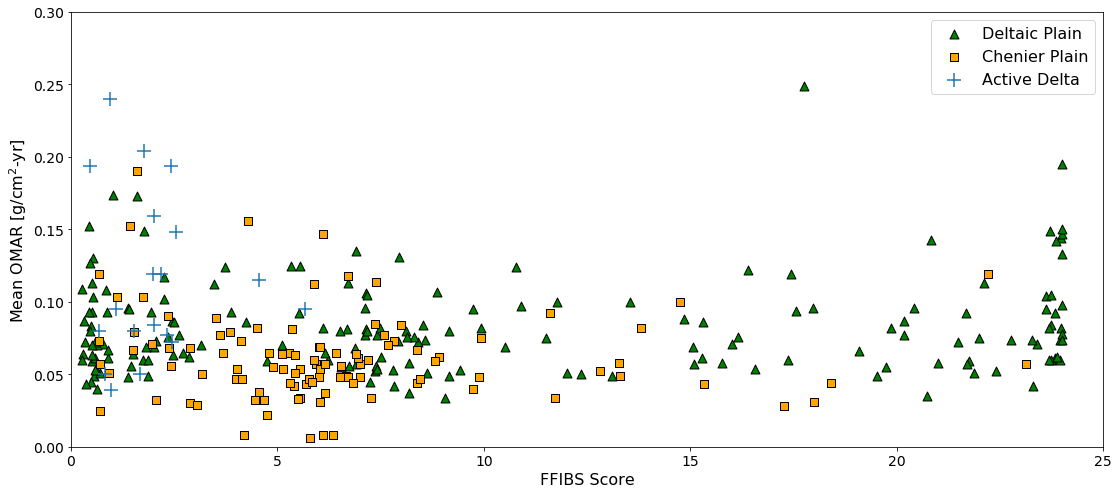

In [28]:
#Plot the three designations
fig = plt.figure()
fig.set_size_inches(18.5, 8)
marker_size = 100  
plt.gca().set_prop_cycle(None)

plt.scatter(FFIBS_values_deltaic, m_OMAR_values_deltaic, s=80, marker='^',c = 'g', edgecolor='k', label='Deltaic Plain')
plt.scatter(FFIBS_values_chenier, m_OMAR_values_chenier, s=80, marker='s',c = 'orange', edgecolor='k', label='Chenier Plain')
plt.scatter(FFIBS_values_active, m_OMAR_values_active, s=200, marker='+', label='Active Delta')

plt.legend(fontsize=16)
plt.xlabel('FFIBS Score', fontsize=16)
plt.ylabel('Mean OMAR [g/cm$^2$-yr]', fontsize=16)
plt.xlim([0, 25])
plt.ylim([0, 0.3])
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

plt.show()

for delta: y = ax^2 + bx + c where a = 8.27673924422767e-05, b = -0.001607117999997857, and c = 0.08405908121112873
the min x value for delta is: 0.258376523
the max x value for delta is: 24.0
the r-squared value is: 0.029008895046769845


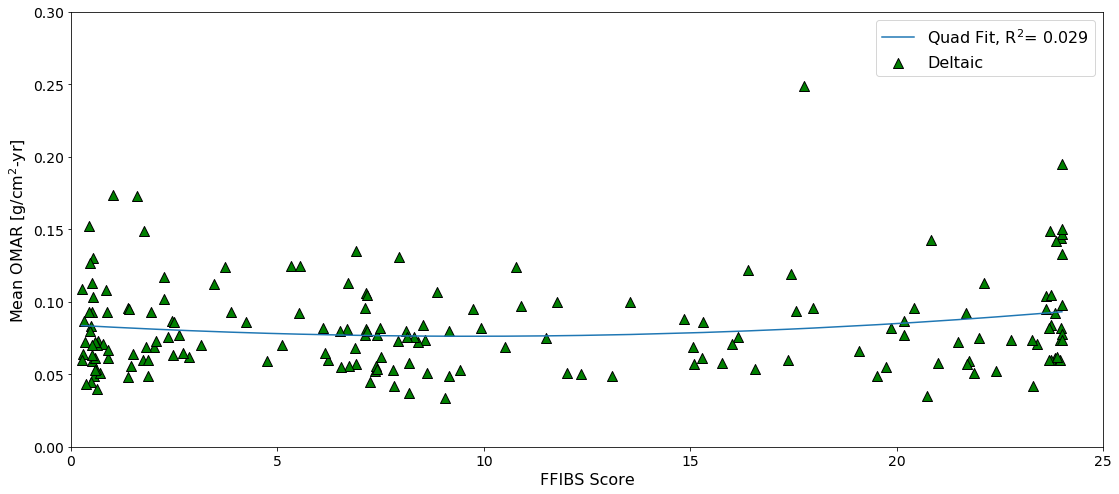

In [23]:
#Fit a quadratic - Deltaic
x = np.array(FFIBS_values_deltaic)
y = np.array(m_OMAR_values_deltaic)
coefficients = np.polyfit(x, y, 2) #[a, b, c] for the quadratic equation y = ax^2 + bx + c

x_s = np.array(FFIBS_values_deltaic)
x_s.sort()
xs2 = x_s*x_s
y_s = (coefficients[0]*(xs2))+(coefficients[1]*x_s)+coefficients[2]

x2 = x*x
y_fit = (coefficients[0]*(x2))+(coefficients[1]*x)+coefficients[2]

# Calculate R-squared
ss_res = np.sum(np.square((y - y_fit)))
ss_tot = np.sum(np.square(y - np.mean(y)))
r_squared = 1 - (ss_res / ss_tot)

xs_delta = x_s
ys_delta = y_s

#Print the equation out
print('for delta: y = ax^2 + bx + c where a = ' + str(coefficients[0]) + ', b = ' + str(coefficients[1]) + ', and c = ' + str(coefficients[2]))
print('the min x value for delta is: ' + str(min(xs_delta)))
print('the max x value for delta is: ' + str(max(xs_delta)))
print('the r-squared value is: ' + str(r_squared))

fig = plt.figure()
fig.set_size_inches(18.5, 8)
plt.scatter(x, y, s=100, marker='^', c = 'g',edgecolor='k', label='Deltaic')
plt.plot(x_s, y_s,label=('Quad Fit, R$^2$= '+ str(round(r_squared,3))))
plt.legend(fontsize=16)
plt.xlabel('FFIBS Score', fontsize=16)
plt.ylabel('Mean OMAR [g/cm$^2$-yr]', fontsize=16)
plt.xlim([0, 25])
plt.ylim([0, 0.3])
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.show()



for chenier: y = ax^2 + bx + c where a = 0.00021416423943288512, b = -0.004957864384260132, and c = 0.08114939172921586
the min x value for chenier is: 0.679
the max x value for chenier is: 23.138
the r-squared value is: 0.05174526716396399


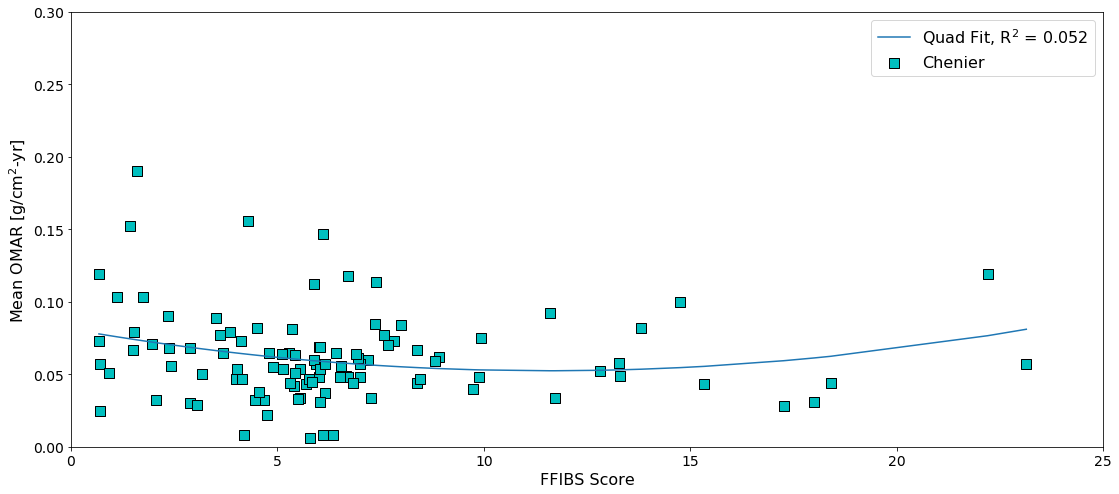

In [25]:
#Fit a quadratic - Chenier
fig = plt.figure()
fig.set_size_inches(18.5, 8)

del x,y
x = np.array(FFIBS_values_chenier)
y = np.array(m_OMAR_values_chenier)
coefficients = np.polyfit(x, y, 2) #[a, b, c] for the quadratic equation y = ax^2 + bx + c

x_s = np.array(FFIBS_values_chenier)
x_s.sort()
xs2 = x_s*x_s
x2 = x*x
y_s = (coefficients[0]*(xs2))+(coefficients[1]*x_s)+coefficients[2]
y_fit = (coefficients[0]*(x2))+(coefficients[1]*x)+coefficients[2]

# Calculate R-squared
ss_res = np.sum(np.square((y - y_fit)))
ss_tot = np.sum(np.square(y - np.mean(y)))
r_squared = 1 - (ss_res / ss_tot)
xs_chen = x_s
ys_chen = y_s

#Print the equation out
print('for chenier: y = ax^2 + bx + c where a = ' + str(coefficients[0]) + ', b = ' + str(coefficients[1]) + ', and c = ' + str(coefficients[2]))
print('the min x value for chenier is: ' + str(min(xs_chen)))
print('the max x value for chenier is: ' + str(max(xs_chen)))
print('the r-squared value is: ' + str(r_squared))


plt.scatter(x, y, s=100, marker='s', c = 'c',edgecolor='k', label='Chenier') 
plt.plot(x_s, y_s,label=('Quad Fit, R$^2$ = '+ str(round(r_squared,3))))
plt.legend(fontsize=16)
plt.xlabel('FFIBS Score', fontsize=16)
plt.ylabel('Mean OMAR [g/cm$^2$-yr]', fontsize=16)
plt.xlim([0, 25])
plt.ylim([0, 0.3])
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.show()

C:\Users\madel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\madel\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\madel\Anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\madel\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\madel\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


The median for Deltaic Forested = nan
The mean for Deltaic Forested = nan
The standard deviation for Deltaic Forested = nan
The median for Deltaic Fresh = 0.0715
The mean for Deltaic Fresh = 0.07994736842105266
The standard deviation for Deltaic Fresh = 0.03024196053970904
The median for Deltaic Intermediate = 0.076
The mean for Deltaic Intermediate = 0.08552000000000001
The standard deviation for Deltaic Intermediate = 0.02941580527539574
The median for Deltaic Brackish = 0.076
The mean for Deltaic Brackish = 0.07943055555555555
The standard deviation for Deltaic Brackish = 0.03115856685696964
The median for Deltaic Saline = 0.077
The mean for Deltaic Saline = 0.0869111111111111
The standard deviation for Deltaic Saline = 0.03462357720925774


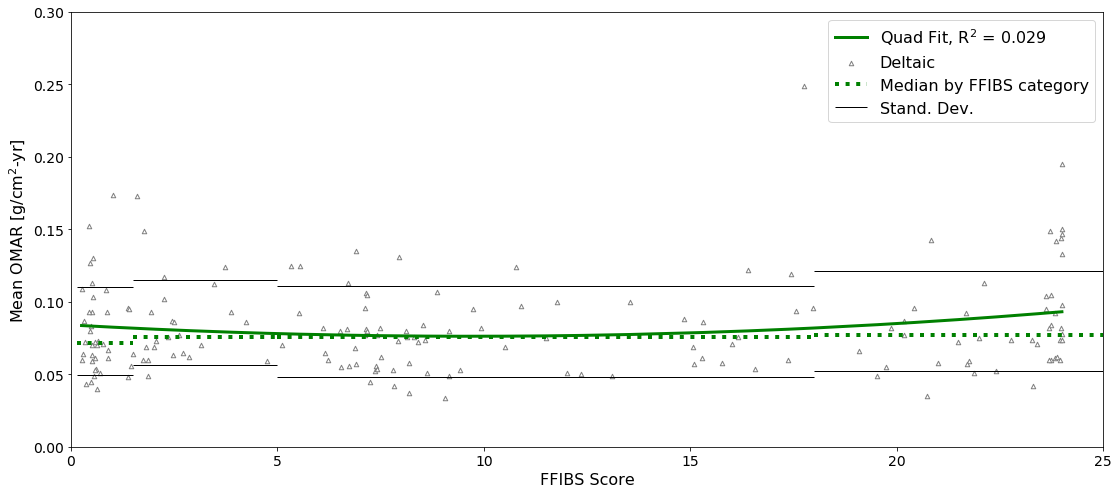

The median for Chenier Forested = nan
The mean for Chenier Forested = nan
The standard deviation for Chenier Forested = nan
The median for Chenier Fresh = 0.07
The mean for Chenier Fresh = 0.080875
The standard deviation for Chenier Fresh = 0.0384721896309529
The median for Chenier Intermediate = 0.065
The mean for Chenier Intermediate = 0.06506896551724138
The standard deviation for Chenier Intermediate = 0.03727061432326135
The median for Chenier Brackish = 0.054
The mean for Chenier Brackish = 0.05767692307692308
The standard deviation for Chenier Brackish = 0.02488565091175586
The median for Chenier Saline = 0.057
The mean for Chenier Saline = 0.07333333333333332
The standard deviation for Chenier Saline = 0.03272443871006635


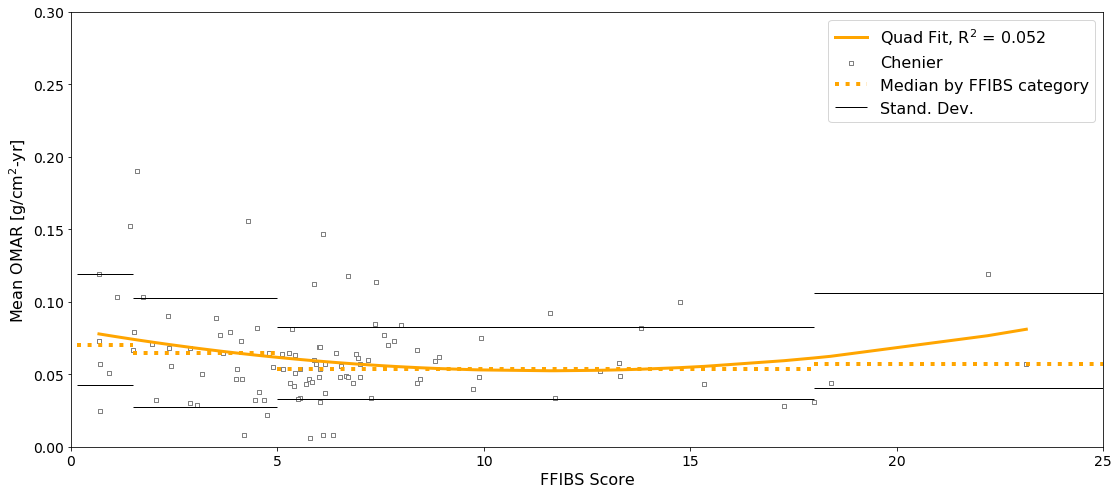

In [27]:
#Plot individual plots for Chenier and Deltaic
min_FFIBS = [0,0.15,1.5,5,18]
max_FFIBS = [0.15,1.5,5,18,30]
FFIBS_label = ['Forested','Fresh','Intermediate','Brackish','Saline']
reg = ['Deltaic','Chenier']


for region in reg:
    m = 0
    fig = plt.figure()
    fig.set_size_inches(18.5, 8)
    if region == 'Deltaic':   
        FFIBS = np.array(FFIBS_values_deltaic)
        OMAR = np.array(m_OMAR_values_deltaic)
        plt.scatter(FFIBS_values_deltaic, m_OMAR_values_deltaic, s=20, marker='^', c = 'w', edgecolor='gray', label='Deltaic')
        col = 'g'
        plt.plot(xs_delta, ys_delta, c= col, linewidth = 3, label=('Quad Fit, R$^2$ = 0.029'))
        
    elif region == 'Chenier':
        FFIBS = np.array(FFIBS_values_chenier)
        OMAR = np.array(m_OMAR_values_chenier)  
        plt.scatter(FFIBS_values_chenier, m_OMAR_values_chenier, s=20, marker='s', c = 'w', edgecolor='gray', label='Chenier')
        col = 'orange'
        plt.plot(xs_chen, ys_chen, c = col, linewidth = 3, label=('Quad Fit, R$^2$ = 0.052'))   
        


    for i in range(0,5):
        #calculate
        indices = np.where((FFIBS >= min_FFIBS[i]) & (FFIBS < max_FFIBS[i]))
        med = np.median(OMAR[indices])
        avg = np.mean(OMAR[indices])
        std = np.std(OMAR[indices])
        
        #print
        print('The median for ' + region + ' ' + FFIBS_label[i]+' = ' + str(med))
        print('The mean for ' + region + ' ' + FFIBS_label[i]+' = ' + str(avg))
        print('The standard deviation for ' + region + ' ' + FFIBS_label[i]+' = ' + str(std))
        
        #plot
        if m == 0:
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4, label='Median by FFIBS category')
            plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1, label = 'Stand. Dev.')
            plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            m = 1
        else:                
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4)
            plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
 
    plt.legend(fontsize=16)
    plt.xlabel('FFIBS Score', fontsize=16)
    plt.ylabel('Mean OMAR [g/cm$^2$-yr]', fontsize=16) #NOTE: ADDING PER YEAR, it is not listed on the spread sheet but there are rates per year (see report)
    plt.xlim([0, 25])
    plt.ylim([0, 0.3])
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.show()



The median for Active Delta = 0.095
The mean for Active Delta = 0.11652631578947369
The standard deviation for Active Delta = 0.05655492758190937


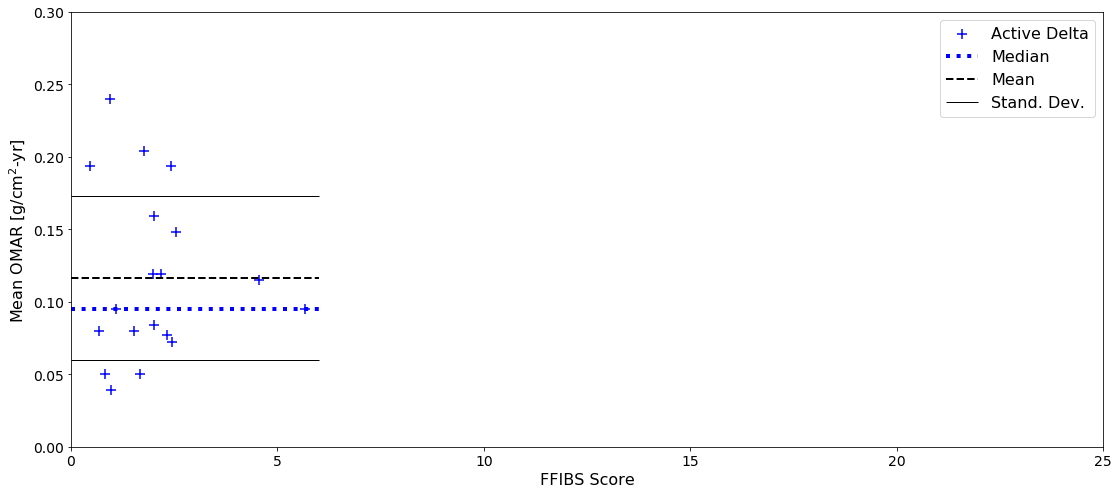

In [30]:
#Active as just one value
#Plot individual plots for Active Delta
min_FFIBS = [0]
max_FFIBS = [6]
FFIBS_label = ['Forested','Fresh','Intermediate']
reg = ['Active Delta']


for region in reg:
    m = 0
    fig = plt.figure()
    fig.set_size_inches(18.5, 8)
    if region == 'Active Delta':
        FFIBS = np.array(FFIBS_values_active)
        OMAR = np.array(m_OMAR_values_active) 
        plt.scatter(FFIBS_values_active, m_OMAR_values_active, s=100, marker='+', c = 'b', label='Active Delta')
        col= 'b'

    for i in range(0,1):
        #calculate
        indices = np.where((FFIBS >= min_FFIBS[i]) & (FFIBS < max_FFIBS[i]))
        med = np.median(OMAR[indices])
        avg = np.mean(OMAR[indices])
        std = np.std(OMAR[indices])
        
        #print
        print('The median for ' + region + ' = ' + str(med))
        print('The mean for ' + region + ' = ' + str(avg))
        print('The standard deviation for ' + region + ' = ' + str(std))
        
        #plot
        if m == 0:
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4, label='Median')
            plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2,label = 'Mean')
            plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1, label = 'Stand. Dev.')
            plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            m = 1
        else:                
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4)
            plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2)
            plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
 
    plt.legend(fontsize=16)
    plt.xlabel('FFIBS Score', fontsize=16)
    plt.ylabel('Mean OMAR [g/cm$^2$-yr]', fontsize=16)
    plt.xlim([0, 25])
    plt.ylim([0, 0.3])
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.show()


# Additional Misc Plots and Stats

In [31]:
med = np.median(m_OMAR_values_deltaic)
print('Deltaic median = ' + str(med))

med = np.median(m_OMAR_values_chenier)
print('Chenier median = ' + str(med))

med = np.median(m_OMAR_values_active)
print('Active Delta median = ' + str(med))

Deltaic median = 0.075
Chenier median = 0.057
Active Delta median = 0.095


The median for Deltaic Forested = 0.07100000000000001
The mean for Deltaic Forested = 0.07746428571428574
The standard deviation for Deltaic Forested = 0.028089756830124216
The median for Deltaic Fresh = 0.08199999999999999
The mean for Deltaic Fresh = 0.0869
The standard deviation for Deltaic Fresh = 0.034648087970333946
The median for Deltaic Intermediate = 0.076
The mean for Deltaic Intermediate = 0.08552000000000001
The standard deviation for Deltaic Intermediate = 0.02941580527539574
The median for Deltaic Brackish = 0.076
The mean for Deltaic Brackish = 0.07943055555555555
The standard deviation for Deltaic Brackish = 0.03115856685696964
The median for Deltaic Saline = 0.077
The mean for Deltaic Saline = 0.0869111111111111
The standard deviation for Deltaic Saline = 0.03462357720925774
The median for Chenier Forested = 0.065
The mean for Chenier Forested = 0.0685
The standard deviation for Chenier Forested = 0.03389321466016465
The median for Chenier Fresh = 0.08499999999999999
T

C:\Users\madel\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\madel\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\madel\Anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\madel\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\madel\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


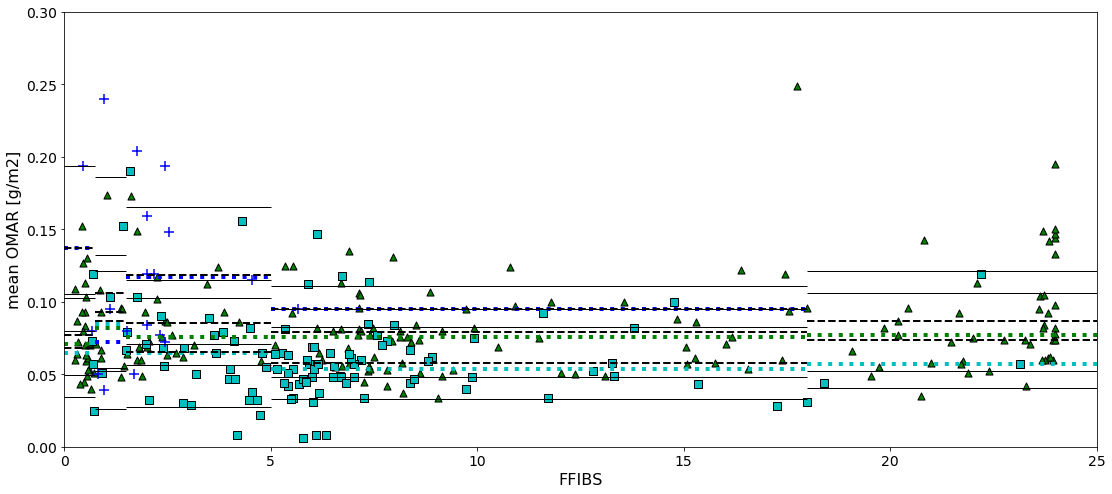

In [32]:
#Plot all data by Chenier, Deltaic, and Active Delta -- not helpful too busy of a plot
fig = plt.figure()
fig.set_size_inches(18.5, 8)
plt.scatter(FFIBS_values_deltaic, m_OMAR_values_deltaic, s=50, marker='^', c = 'g', edgecolor='k', label='Deltaic')
plt.scatter(FFIBS_values_chenier, m_OMAR_values_chenier, s=50, marker='s', c = 'c', edgecolor='k', label='Chenier')
plt.scatter(FFIBS_values_active, m_OMAR_values_active, s=100, marker='+', c = 'b', label='Active Delta')

min_FFIBS = [0,0.75,1.5,5,18]
max_FFIBS = [0.75,1.5,5,18,30]
FFIBS_label = ['Forested','Fresh','Intermediate','Brackish','Saline']
reg = ['Deltaic','Chenier','Active Delta']

for region in reg:
    if region == 'Deltaic':   
        FFIBS = np.array(FFIBS_values_deltaic)
        OMAR = np.array(m_OMAR_values_deltaic)
        col = 'g'
    elif region == 'Chenier':
        FFIBS = np.array(FFIBS_values_chenier)
        OMAR = np.array(m_OMAR_values_chenier)  
        col = 'c'
    elif region == 'Active Delta':
        FFIBS = np.array(FFIBS_values_active)
        OMAR = np.array(m_OMAR_values_active)     
        col= 'b'

    for i in range(0,5):
        #calculate
        indices = np.where((FFIBS >= min_FFIBS[i]) & (FFIBS < max_FFIBS[i]))
        med = np.median(OMAR[indices])
        avg = np.mean(OMAR[indices])
        std = np.std(OMAR[indices])
        
        #print
        print('The median for ' + region + ' ' + FFIBS_label[i]+' = ' + str(med))
        print('The mean for ' + region + ' ' + FFIBS_label[i]+' = ' + str(avg))
        print('The standard deviation for ' + region + ' ' + FFIBS_label[i]+' = ' + str(std))
        
        #plot
        plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4)
        plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2)
        plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
        plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
 

plt.xlabel('FFIBS', fontsize=16)
plt.ylabel('mean OMAR [g/m2]', fontsize=16)
plt.xlim([0, 25])
plt.ylim([0, 0.3])
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.show()

The median for Deltaic Forested = 0.07100000000000001
The mean for Deltaic Forested = 0.07746428571428574
The standard deviation for Deltaic Forested = 0.028089756830124216
The median for Deltaic Fresh = 0.08199999999999999
The mean for Deltaic Fresh = 0.0869
The standard deviation for Deltaic Fresh = 0.034648087970333946
The median for Deltaic Intermediate = 0.076
The mean for Deltaic Intermediate = 0.08552000000000001
The standard deviation for Deltaic Intermediate = 0.02941580527539574
The median for Deltaic Brackish = 0.076
The mean for Deltaic Brackish = 0.07943055555555555
The standard deviation for Deltaic Brackish = 0.03115856685696964
The median for Deltaic Saline = 0.077
The mean for Deltaic Saline = 0.0869111111111111
The standard deviation for Deltaic Saline = 0.03462357720925774


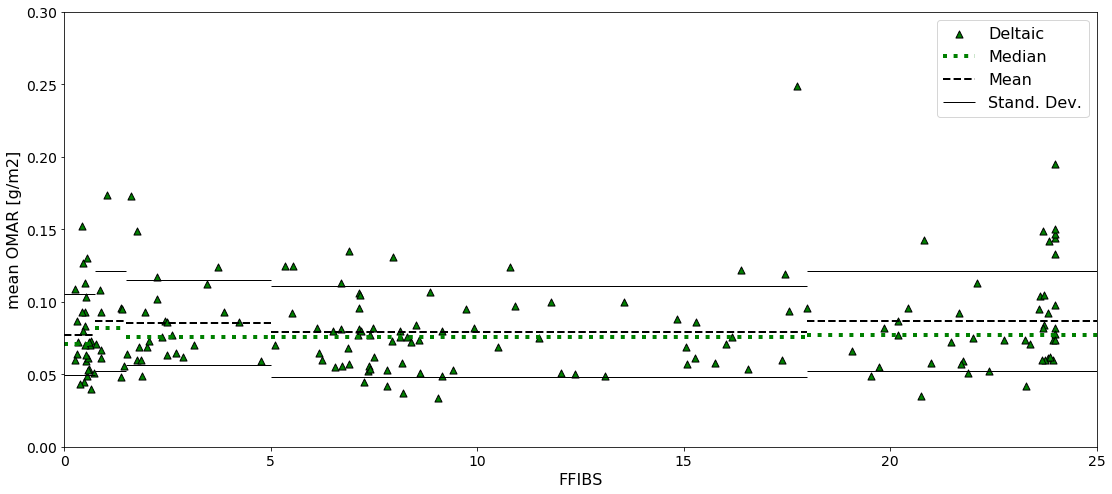

The median for Chenier Forested = 0.065
The mean for Chenier Forested = 0.0685
The standard deviation for Chenier Forested = 0.03389321466016465
The median for Chenier Fresh = 0.08499999999999999
The mean for Chenier Fresh = 0.09324999999999999
The standard deviation for Chenier Fresh = 0.038796745997570464
The median for Chenier Intermediate = 0.065
The mean for Chenier Intermediate = 0.06506896551724138
The standard deviation for Chenier Intermediate = 0.03727061432326135
The median for Chenier Brackish = 0.054
The mean for Chenier Brackish = 0.05767692307692308
The standard deviation for Chenier Brackish = 0.02488565091175586
The median for Chenier Saline = 0.057
The mean for Chenier Saline = 0.07333333333333332
The standard deviation for Chenier Saline = 0.03272443871006635


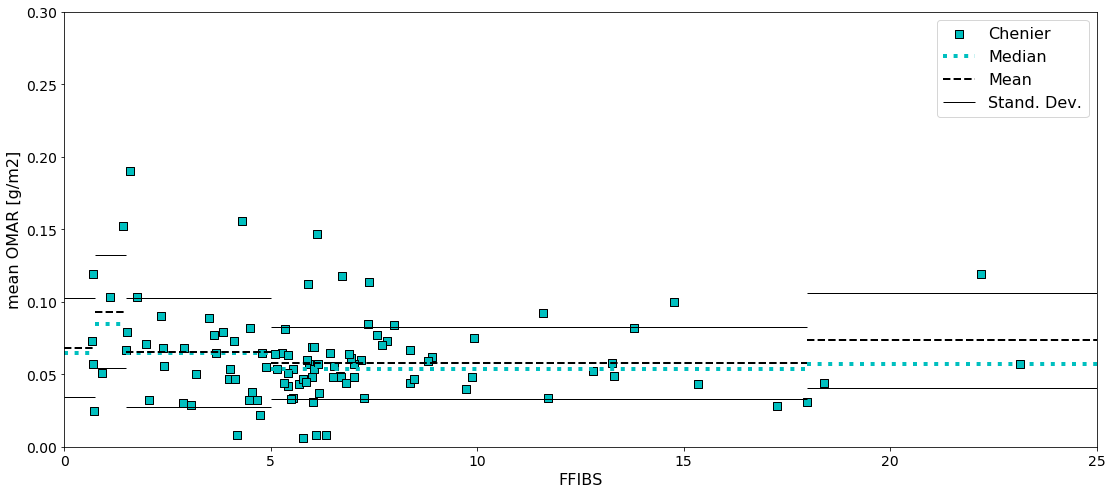

In [33]:
#Plot individual plots for Chenier and Deltaic
min_FFIBS = [0,0.75,1.5,5,18]
max_FFIBS = [0.75,1.5,5,18,30]
FFIBS_label = ['Forested','Fresh','Intermediate','Brackish','Saline']
reg = ['Deltaic','Chenier']


for region in reg:
    m = 0
    fig = plt.figure()
    fig.set_size_inches(18.5, 8)
    if region == 'Deltaic':   
        FFIBS = np.array(FFIBS_values_deltaic)
        OMAR = np.array(m_OMAR_values_deltaic)
        plt.scatter(FFIBS_values_deltaic, m_OMAR_values_deltaic, s=50, marker='^', c = 'g', edgecolor='k', label='Deltaic')
        col = 'g'
    elif region == 'Chenier':
        FFIBS = np.array(FFIBS_values_chenier)
        OMAR = np.array(m_OMAR_values_chenier)  
        plt.scatter(FFIBS_values_chenier, m_OMAR_values_chenier, s=50, marker='s', c = 'c', edgecolor='k', label='Chenier')
        col = 'c'


    for i in range(0,5):
        #calculate
        indices = np.where((FFIBS >= min_FFIBS[i]) & (FFIBS < max_FFIBS[i]))
        med = np.median(OMAR[indices])
        avg = np.mean(OMAR[indices])
        std = np.std(OMAR[indices])
        
        #print
        print('The median for ' + region + ' ' + FFIBS_label[i]+' = ' + str(med))
        print('The mean for ' + region + ' ' + FFIBS_label[i]+' = ' + str(avg))
        print('The standard deviation for ' + region + ' ' + FFIBS_label[i]+' = ' + str(std))

        
        #plot
        if m == 0:
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4, label='Median')
            plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2,label = 'Mean')
            plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1, label = 'Stand. Dev.')
            plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            m = 1
        else:                
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4)
            plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2)
            plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
 
    plt.legend(fontsize=16)
    plt.xlabel('FFIBS', fontsize=16)
    plt.ylabel('mean OMAR [g/m2]', fontsize=16)
    plt.xlim([0, 25])
    plt.ylim([0, 0.3])
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.show()




The median for All non-active Forested = 0.07100000000000001
The mean for All non-active Forested = 0.07634375
The standard deviation for All non-active Forested = 0.02903081269853636
The median for All non-active Fresh = 0.08199999999999999
The mean for All non-active Fresh = 0.0887142857142857
The standard deviation for All non-active Fresh = 0.035996881951136844
The median for All non-active Intermediate = 0.069
The mean for All non-active Intermediate = 0.07453703703703703
The standard deviation for All non-active Intermediate = 0.03536356828137145
The median for All non-active Brackish = 0.063
The mean for All non-active Brackish = 0.06910948905109489
The standard deviation for All non-active Brackish = 0.030365337238014455
The median for All non-active Saline = 0.076
The mean for All non-active Saline = 0.0860625
The standard deviation for All non-active Saline = 0.034664106225556525


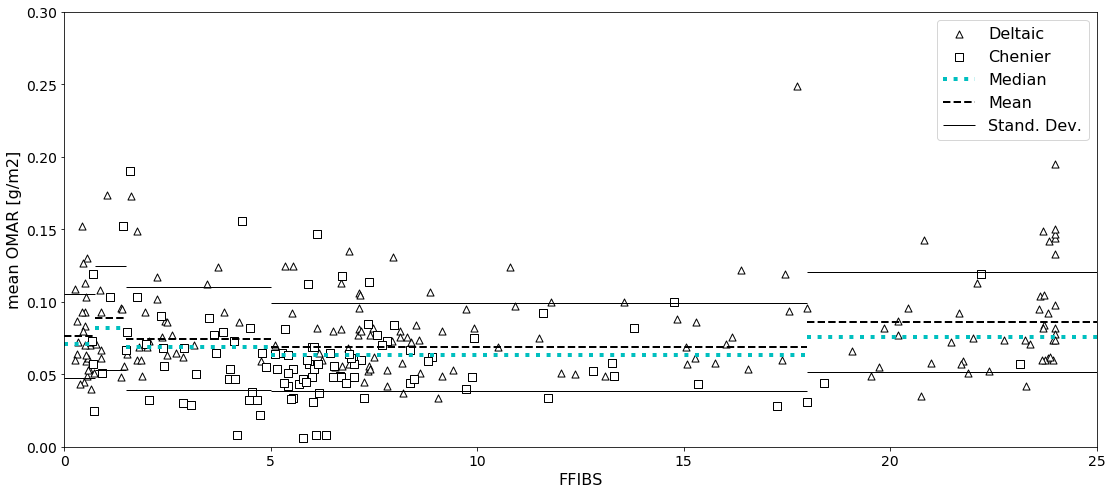

In [34]:
#Plot all Chenier and Deltaic together
min_FFIBS = [0,0.75,1.5,5,18]
max_FFIBS = [0.75,1.5,5,18,30]
FFIBS_label = ['Forested','Fresh','Intermediate','Brackish','Saline']
reg = ['All non-active']
FFIBS = np.array(FFIBS_values_deltaic + FFIBS_values_chenier)
OMAR = np.array(m_OMAR_values_deltaic + m_OMAR_values_chenier)

for region in reg:
    m = 0
    fig = plt.figure()
    fig.set_size_inches(18.5, 8)
    plt.scatter(FFIBS_values_deltaic, m_OMAR_values_deltaic, s=50, marker='^', c = 'w', edgecolor='k', label='Deltaic')
    plt.scatter(FFIBS_values_chenier, m_OMAR_values_chenier, s=50, marker='s', c = 'w', edgecolor='k', label='Chenier')


    for i in range(0,5):
        #calculate
        indices = np.where((FFIBS >= min_FFIBS[i]) & (FFIBS < max_FFIBS[i]))
        med = np.median(OMAR[indices])
        avg = np.mean(OMAR[indices])
        std = np.std(OMAR[indices])
        
        #print
        print('The median for ' + region + ' ' + FFIBS_label[i]+' = ' + str(med))
        print('The mean for ' + region + ' ' + FFIBS_label[i]+' = ' + str(avg))
        print('The standard deviation for ' + region + ' ' + FFIBS_label[i]+' = ' + str(std))

        
        #plot
        if m == 0:
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4, label='Median')
            plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2,label = 'Mean')
            plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1, label = 'Stand. Dev.')
            plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            m = 1
        else:                
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4)
            plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2)
            plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
 
    plt.legend(fontsize=16)
    plt.xlabel('FFIBS', fontsize=16)
    plt.ylabel('mean OMAR [g/m2]', fontsize=16)
    plt.xlim([0, 25])
    plt.ylim([0, 0.3])
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.show()

The median for Active Delta Forested = 0.137
The mean for Active Delta Forested = 0.137
The standard deviation for Active Delta Forested = 0.057
The median for Active Delta Fresh = 0.07250000000000001
The mean for Active Delta Fresh = 0.10599999999999998
The standard deviation for Active Delta Fresh = 0.08015921656303783
The median for Active Delta Intermediate = 0.11699999999999999
The mean for Active Delta Intermediate = 0.11841666666666668
The standard deviation for Active Delta Intermediate = 0.047243091793639225


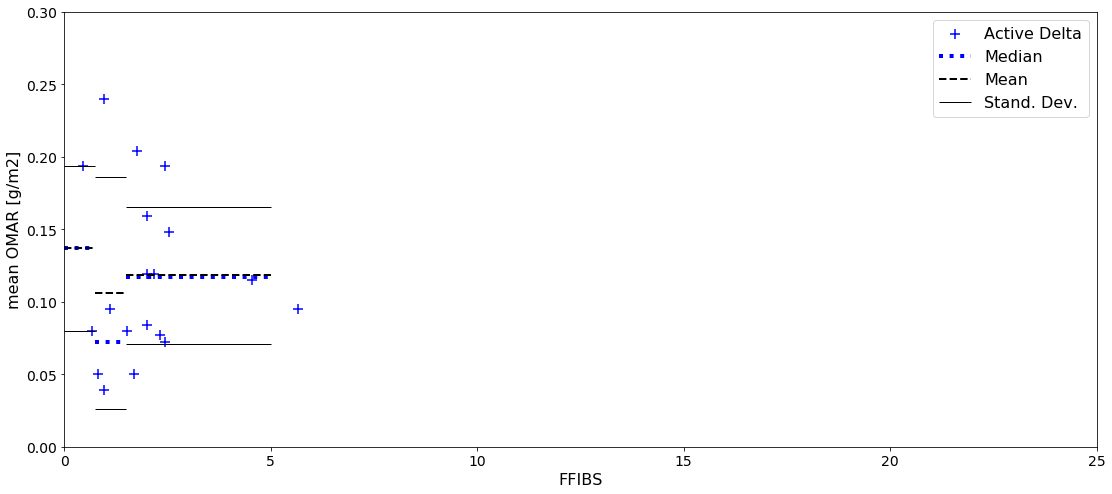

In [35]:
#Plot individual plots for Active Delta
min_FFIBS = [0,0.75,1.5]
max_FFIBS = [0.75,1.5,5]
FFIBS_label = ['Forested','Fresh','Intermediate']
reg = ['Active Delta']


for region in reg:
    m = 0
    fig = plt.figure()
    fig.set_size_inches(18.5, 8)
    if region == 'Active Delta':
        FFIBS = np.array(FFIBS_values_active)
        OMAR = np.array(m_OMAR_values_active) 
        plt.scatter(FFIBS_values_active, m_OMAR_values_active, s=100, marker='+', c = 'b', label='Active Delta')
        col= 'b'

    for i in range(0,3):
        #calculate
        indices = np.where((FFIBS >= min_FFIBS[i]) & (FFIBS < max_FFIBS[i]))
        med = np.median(OMAR[indices])
        avg = np.mean(OMAR[indices])
        std = np.std(OMAR[indices])
        
        #print
        print('The median for ' + region + ' ' + FFIBS_label[i]+' = ' + str(med))
        print('The mean for ' + region + ' ' + FFIBS_label[i]+' = ' + str(avg))
        print('The standard deviation for ' + region + ' ' + FFIBS_label[i]+' = ' + str(std))

        
        #plot
        if m == 0:
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4, label='Median')
            plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2,label = 'Mean')
            plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1, label = 'Stand. Dev.')
            plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            m = 1
        else:                
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4)
            plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2)
            plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
 
    plt.legend(fontsize=16)
    plt.xlabel('FFIBS', fontsize=16)
    plt.ylabel('mean OMAR [g/m2]', fontsize=16)
    plt.xlim([0, 25])
    plt.ylim([0, 0.3])
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.show()

In [36]:
print(m_OMAR_values_active)

[0.095, 0.148, 0.115, 0.119, 0.204, 0.077, 0.119, 0.072, 0.194, 0.084, 0.159, 0.24, 0.095, 0.039, 0.05, 0.05, 0.194, 0.08, 0.08]


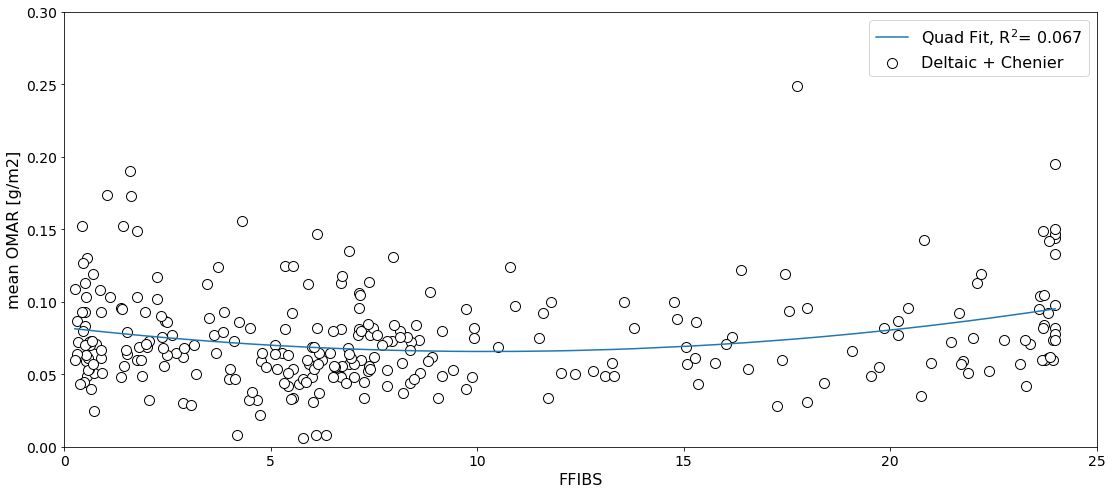

In [37]:
#Fit a quadratic - Deltaic + Chenier (not active delta)
x = np.concatenate((np.array(FFIBS_values_deltaic),np.array(FFIBS_values_chenier)))
y = np.concatenate((np.array(m_OMAR_values_deltaic), np.array(m_OMAR_values_chenier)))

x_s = np.concatenate((np.array(FFIBS_values_deltaic),np.array(FFIBS_values_chenier)))
# y_s = np.array(m_OMAR_values_deltaic)

coefficients = np.polyfit(x, y, 2) #[a, b, c] for the quadratic equation y = ax^2 + bx + c

x_s.sort()
xs2 = x_s*x_s
y_s = (coefficients[0]*(xs2))+(coefficients[1]*x_s)+coefficients[2]

x2 = x*x
y_fit = (coefficients[0]*(x2))+(coefficients[1]*x)+coefficients[2]

xs_all = x_s
ys_all = y_s

# Calculate R-squared
ss_res = np.sum(np.square((y - y_fit)))
ss_tot = np.sum(np.square(y - np.mean(y)))
r_squared = 1 - (ss_res / ss_tot)

fig = plt.figure()
fig.set_size_inches(18.5, 8)
plt.scatter(x, y, s=100, marker='o', c = 'w',edgecolor='k', label='Deltaic + Chenier')
#plt.scatter(FFIBS_values_deltaic, m_OMAR_values_deltaic, s=50, marker='.', c = 'w', edgecolor='k', label='Deltaic files names') # these match the original data 
plt.plot(x_s, y_s,label=('Quad Fit, R$^2$= '+ str(round(r_squared,3))))
plt.legend(fontsize=16)
plt.xlabel('FFIBS', fontsize=16)
plt.ylabel('mean OMAR [g/m2]', fontsize=16)
plt.xlim([0, 25])
plt.ylim([0, 0.3])
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.show()

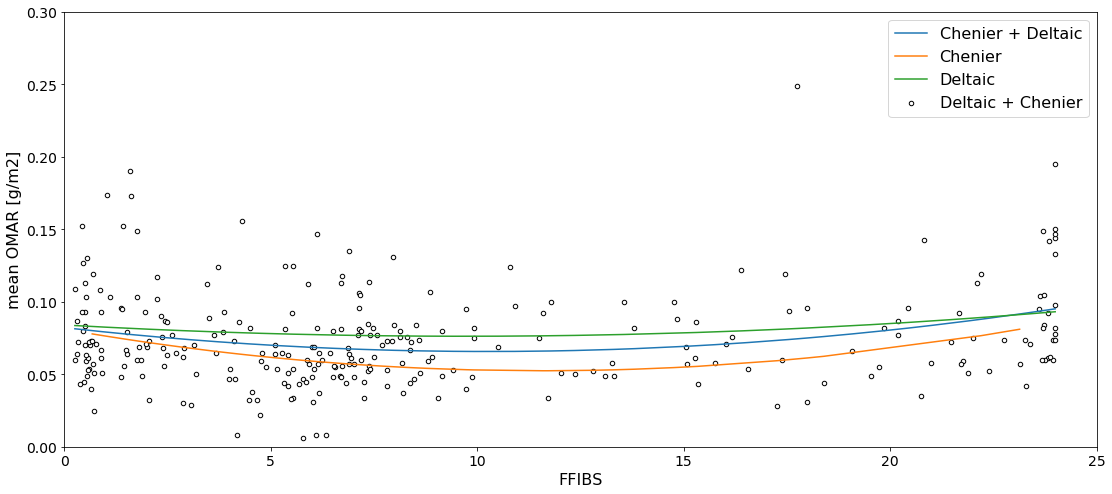

In [38]:
fig = plt.figure()
fig.set_size_inches(18.5, 8)
plt.scatter(x, y, s=20, marker='o', c = 'w',edgecolor='k', label='Deltaic + Chenier')
#plt.scatter(FFIBS_values_deltaic, m_OMAR_values_deltaic, s=50, marker='.', c = 'w', edgecolor='k', label='Deltaic files names') # these match the original data 
plt.plot(xs_all, ys_all,label=('Chenier + Deltaic'))
plt.plot(xs_chen, ys_chen, label=('Chenier'))
plt.plot(xs_delta, ys_delta, label=('Deltaic'))
plt.legend(fontsize=16)
plt.xlabel('FFIBS', fontsize=16)
plt.ylabel('mean OMAR [g/m2]', fontsize=16)
plt.xlim([0, 25])
plt.ylim([0, 0.3])
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.show()

The median for All non-active Forested = 0.07100000000000001
The mean for All non-active Forested = 0.07634375
The standard deviation for All non-active Forested = 0.02903081269853636
The median for All non-active Fresh = 0.08199999999999999
The mean for All non-active Fresh = 0.0887142857142857
The standard deviation for All non-active Fresh = 0.035996881951136844
The median for All non-active Intermediate = 0.069
The mean for All non-active Intermediate = 0.07453703703703703
The standard deviation for All non-active Intermediate = 0.03536356828137145
The median for All non-active Brackish = 0.063
The mean for All non-active Brackish = 0.06910948905109489
The standard deviation for All non-active Brackish = 0.030365337238014455
The median for All non-active Saline = 0.076
The mean for All non-active Saline = 0.0860625
The standard deviation for All non-active Saline = 0.034664106225556525


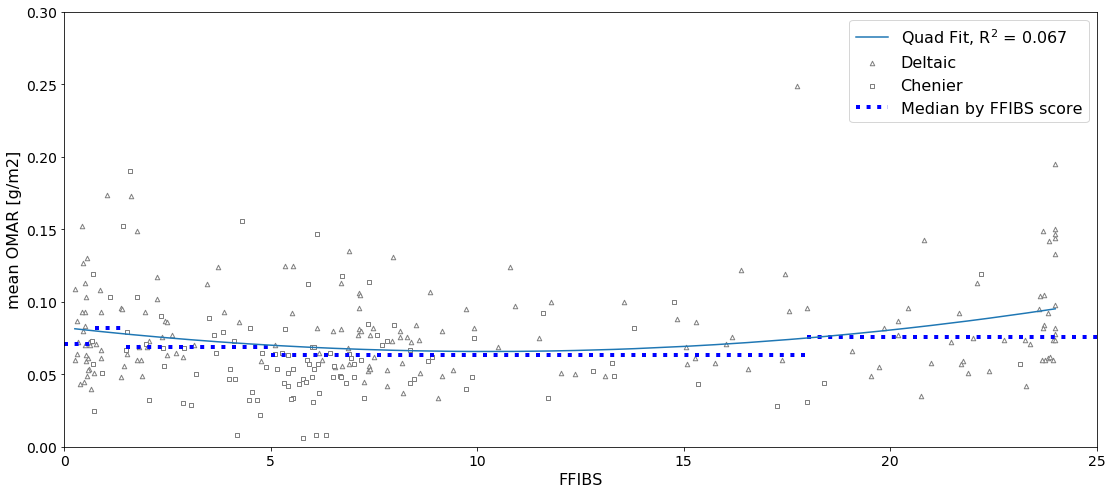

In [39]:
#Plot all Chenier and Deltaic together
min_FFIBS = [0,0.75,1.5,5,18]
max_FFIBS = [0.75,1.5,5,18,30]
FFIBS_label = ['Forested','Fresh','Intermediate','Brackish','Saline']
reg = ['All non-active']
FFIBS = np.array(FFIBS_values_deltaic + FFIBS_values_chenier)
OMAR = np.array(m_OMAR_values_deltaic + m_OMAR_values_chenier)

for region in reg:
    m = 0
    fig = plt.figure()
    fig.set_size_inches(18.5, 8)
    plt.scatter(FFIBS_values_deltaic, m_OMAR_values_deltaic, s=20, marker='^', c = 'w', edgecolor='gray', label='Deltaic')
    plt.scatter(FFIBS_values_chenier, m_OMAR_values_chenier, s=20, marker='s', c = 'w', edgecolor='gray', label='Chenier')


    for i in range(0,5):
        #calculate
        indices = np.where((FFIBS >= min_FFIBS[i]) & (FFIBS < max_FFIBS[i]))
        med = np.median(OMAR[indices])
        avg = np.mean(OMAR[indices])
        std = np.std(OMAR[indices])
        
        #print
        print('The median for ' + region + ' ' + FFIBS_label[i]+' = ' + str(med))
        print('The mean for ' + region + ' ' + FFIBS_label[i]+' = ' + str(avg))
        print('The standard deviation for ' + region + ' ' + FFIBS_label[i]+' = ' + str(std))

        
        #plot
        if m == 0:
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4, label='Median by FFIBS score')
            #plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2,label = 'Mean')
            #plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1, label = 'Stand. Dev.')
            #plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            plt.plot(xs_all, ys_all,label=('Quad Fit, R$^2$ = 0.067'))
            #plt.plot(xs_chen, ys_chen, label=('Chenier'))
            #plt.plot(xs_delta, ys_delta, label=('Deltaic'))
            m = 1
        else:                
            plt.hlines(med, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors=col, linestyles=':', linewidth=4)
            #plt.hlines(avg, xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linestyles='--', linewidth=2)
            #plt.hlines((avg+std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
            #plt.hlines((avg-std), xmin=min_FFIBS[i], xmax=max_FFIBS[i], colors='k', linewidth=1)
 
    plt.legend(fontsize=16)
    plt.xlabel('FFIBS', fontsize=16)
    plt.ylabel('mean OMAR [g/m2]', fontsize=16)
    plt.xlim([0, 25])
    plt.ylim([0, 0.3])
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.show()